In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [6]:
desktop_path = r'/home/tinkerspace/Abhinand'

# Specify the file name
file_name = 'crop_recommendation.csv'

# Concatenate the path and file name
file_path = f'{desktop_path}/{file_name}'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,jaya rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,jaya rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,jaya rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,jaya rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,jaya rice


In [8]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1295,107,34,32,26.774637,66.413269,6.780064,177.774507,gouri rice
1296,99,15,27,27.417112,56.636362,6.086922,127.924610,gouri rice
1297,118,33,30,24.131797,67.225123,6.362608,173.322839,gouri rice
1298,117,32,34,26.272418,52.127394,6.758793,127.175293,gouri rice
1299,104,18,30,23.603016,60.396475,6.779833,140.937041,gouri rice


In [9]:
df.size


10400

In [10]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [13]:
acc = []
model = []

In [14]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  96.92307692307692
                     precision    recall  f1-score   support

Anandaganga coconut       1.00      1.00      1.00        24
             banana       1.00      1.00      1.00        21
         gouri rice       1.00      1.00      1.00        21
          jaya rice       1.00      0.61      0.76        18
  keraganga coconut       1.00      1.00      1.00        16
   kerasree coconut       1.00      1.00      1.00        19
lakshaganga coconut       1.00      1.00      1.00        16
              mango       1.00      1.00      1.00        16
             papaya       1.00      1.00      1.00        21
      pavithra rice       0.95      1.00      0.97        19
         remya rice       0.74      1.00      0.85        20
        sabari rice       1.00      0.97      0.98        29
           uma rice       1.00      1.00      1.00        20

           accuracy                           0.97       260
          macro avg       0.98     

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.99230769, 0.95384615, 0.97692308, 0.97692308, 0.96923077])

In [30]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTreereal.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9846153846153847
                     precision    recall  f1-score   support

Anandaganga coconut       1.00      1.00      1.00        24
             banana       1.00      1.00      1.00        21
         gouri rice       1.00      1.00      1.00        21
          jaya rice       0.89      0.89      0.89        18
  keraganga coconut       1.00      1.00      1.00        16
   kerasree coconut       1.00      1.00      1.00        19
lakshaganga coconut       1.00      1.00      1.00        16
              mango       1.00      1.00      1.00        16
             papaya       1.00      1.00      1.00        21
      pavithra rice       1.00      1.00      1.00        19
         remya rice       0.90      0.90      0.90        20
        sabari rice       1.00      1.00      1.00        29
           uma rice       1.00      1.00      1.00        20

           accuracy                           0.98       260
          macro avg       0.98      0.98     

In [32]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.98846154, 0.99615385, 1.        , 0.99230769, 0.99230769])

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForestreal.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [34]:
from sklearn.svm import SVC
#fit
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.20384615384615384
                     precision    recall  f1-score   support

Anandaganga coconut       1.00      0.04      0.08        24
             banana       1.00      0.14      0.25        21
         gouri rice       0.00      0.00      0.00        21
          jaya rice       0.00      0.00      0.00        18
  keraganga coconut       0.07      1.00      0.13        16
   kerasree coconut       1.00      0.26      0.42        19
lakshaganga coconut       1.00      0.12      0.22        16
              mango       1.00      0.62      0.77        16
             papaya       0.00      0.00      0.00        21
      pavithra rice       1.00      0.74      0.85        19
         remya rice       1.00      0.05      0.10        20
        sabari rice       1.00      0.03      0.07        29
           uma rice       0.00      0.00      0.00        20

           accuracy                           0.20       260
          macro avg       0.62      0.23   

In [35]:
from sklearn.svm import SVC
# fit
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.20384615384615384
                     precision    recall  f1-score   support

Anandaganga coconut       1.00      0.04      0.08        24
             banana       1.00      0.14      0.25        21
         gouri rice       0.00      0.00      0.00        21
          jaya rice       0.00      0.00      0.00        18
  keraganga coconut       0.07      1.00      0.13        16
   kerasree coconut       1.00      0.26      0.42        19
lakshaganga coconut       1.00      0.12      0.22        16
              mango       1.00      0.62      0.77        16
             papaya       0.00      0.00      0.00        21
      pavithra rice       1.00      0.74      0.85        19
         remya rice       1.00      0.05      0.10        20
        sabari rice       1.00      0.03      0.07        29
           uma rice       0.00      0.00      0.00        20

           accuracy                           0.20       260
          macro avg       0.62      0.23   

In [36]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9615384615384616
                     precision    recall  f1-score   support

Anandaganga coconut       1.00      0.88      0.93        24
             banana       1.00      1.00      1.00        21
         gouri rice       1.00      0.95      0.98        21
          jaya rice       0.88      0.83      0.86        18
  keraganga coconut       0.84      1.00      0.91        16
   kerasree coconut       1.00      1.00      1.00        19
lakshaganga coconut       1.00      1.00      1.00        16
              mango       1.00      1.00      1.00        16
             papaya       1.00      0.95      0.98        21
      pavithra rice       1.00      1.00      1.00        19
         remya rice       0.78      0.90      0.84        20
        sabari rice       1.00      1.00      1.00        29
           uma rice       1.00      1.00      1.00        20

           accuracy                           0.96       260
          macro avg       0.

In [37]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegressionreal.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

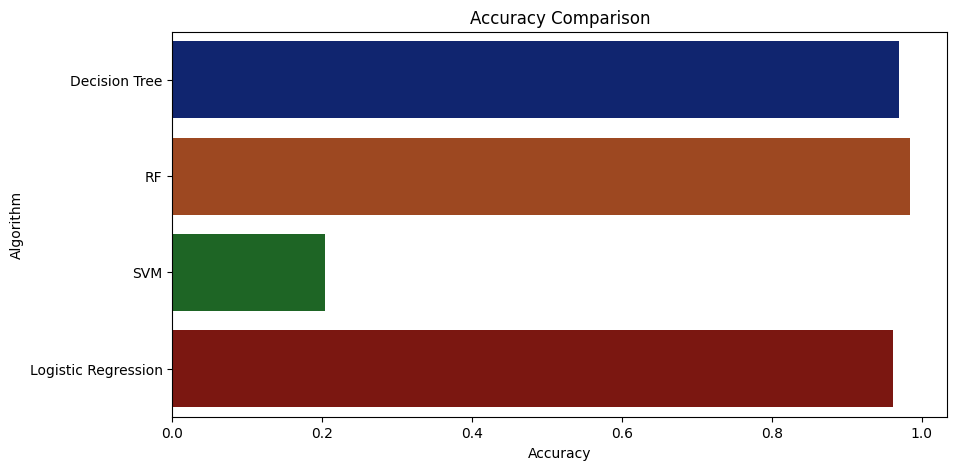

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [39]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['gouri rice']


In [40]:
data = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
prediction = RF.predict(data)
print(prediction)

['jaya rice']


In [42]:
data = np.array([[76, 60, 17, 25.390853, 75.93049, 6.671096, 99.34323]])
prediction = RF.predict(data)
print(prediction)

['uma rice']
